# **Employee Performance Analysis Project**


## **PROBLEM STATEMENT:**

1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This
will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Data**

In [3]:
# importing the data from excel file
data = pd.read_excel('/content/drive/MyDrive/IABAC Project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

# **Exploratory Data Analysis**

In [4]:
# sample() is used to get random values from whole data set
data.sample(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1144,E100892,18,Male,Marketing,Single,Sales,Sales Representative,Travel_Frequently,5,3,...,4,0,3,3,0,0,0,0,Yes,3
728,E1002291,32,Male,Medical,Married,Sales,Sales Representative,Travel_Rarely,1,4,...,2,3,2,3,2,2,2,2,No,2
511,E1001918,37,Female,Medical,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,1,8,2,1,8,4,7,7,No,2
802,E100340,46,Male,Marketing,Single,Sales,Sales Executive,Travel_Frequently,5,4,...,3,14,4,3,9,6,0,8,No,3
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2


In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
# Getting Basic information in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
# Checking for Null Values
data.isnull().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


**In the dataset no missing values are found**

In [8]:
#Checking for duplicate values
data.duplicated().sum()

0

**There are no duplicate values in the dataset**

In [9]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [10]:
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [ ]:
data.shape

(1200, 28)

In [11]:
data['PerformanceRating'].value_counts()

,count
PerformanceRating,
3,874
2,194
4,132


In [12]:
numerical =data.select_dtypes(include=['int','float']).columns.tolist()
print('Numerical:\n',numerical)

Numerical:
 ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


In [14]:
categorical =data.select_dtypes(exclude=['int','float']).columns.tolist()
print('Categorical:\n',categorical)

Categorical:
 ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


**Excluding the 'EmpNumber' column because it doesn't add value to Uni-variate or Bi-variate analysis.**

In [16]:
category=['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [17]:
category

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

# **Uni-Variate Analysis**

#### **1. Numerical Columns**

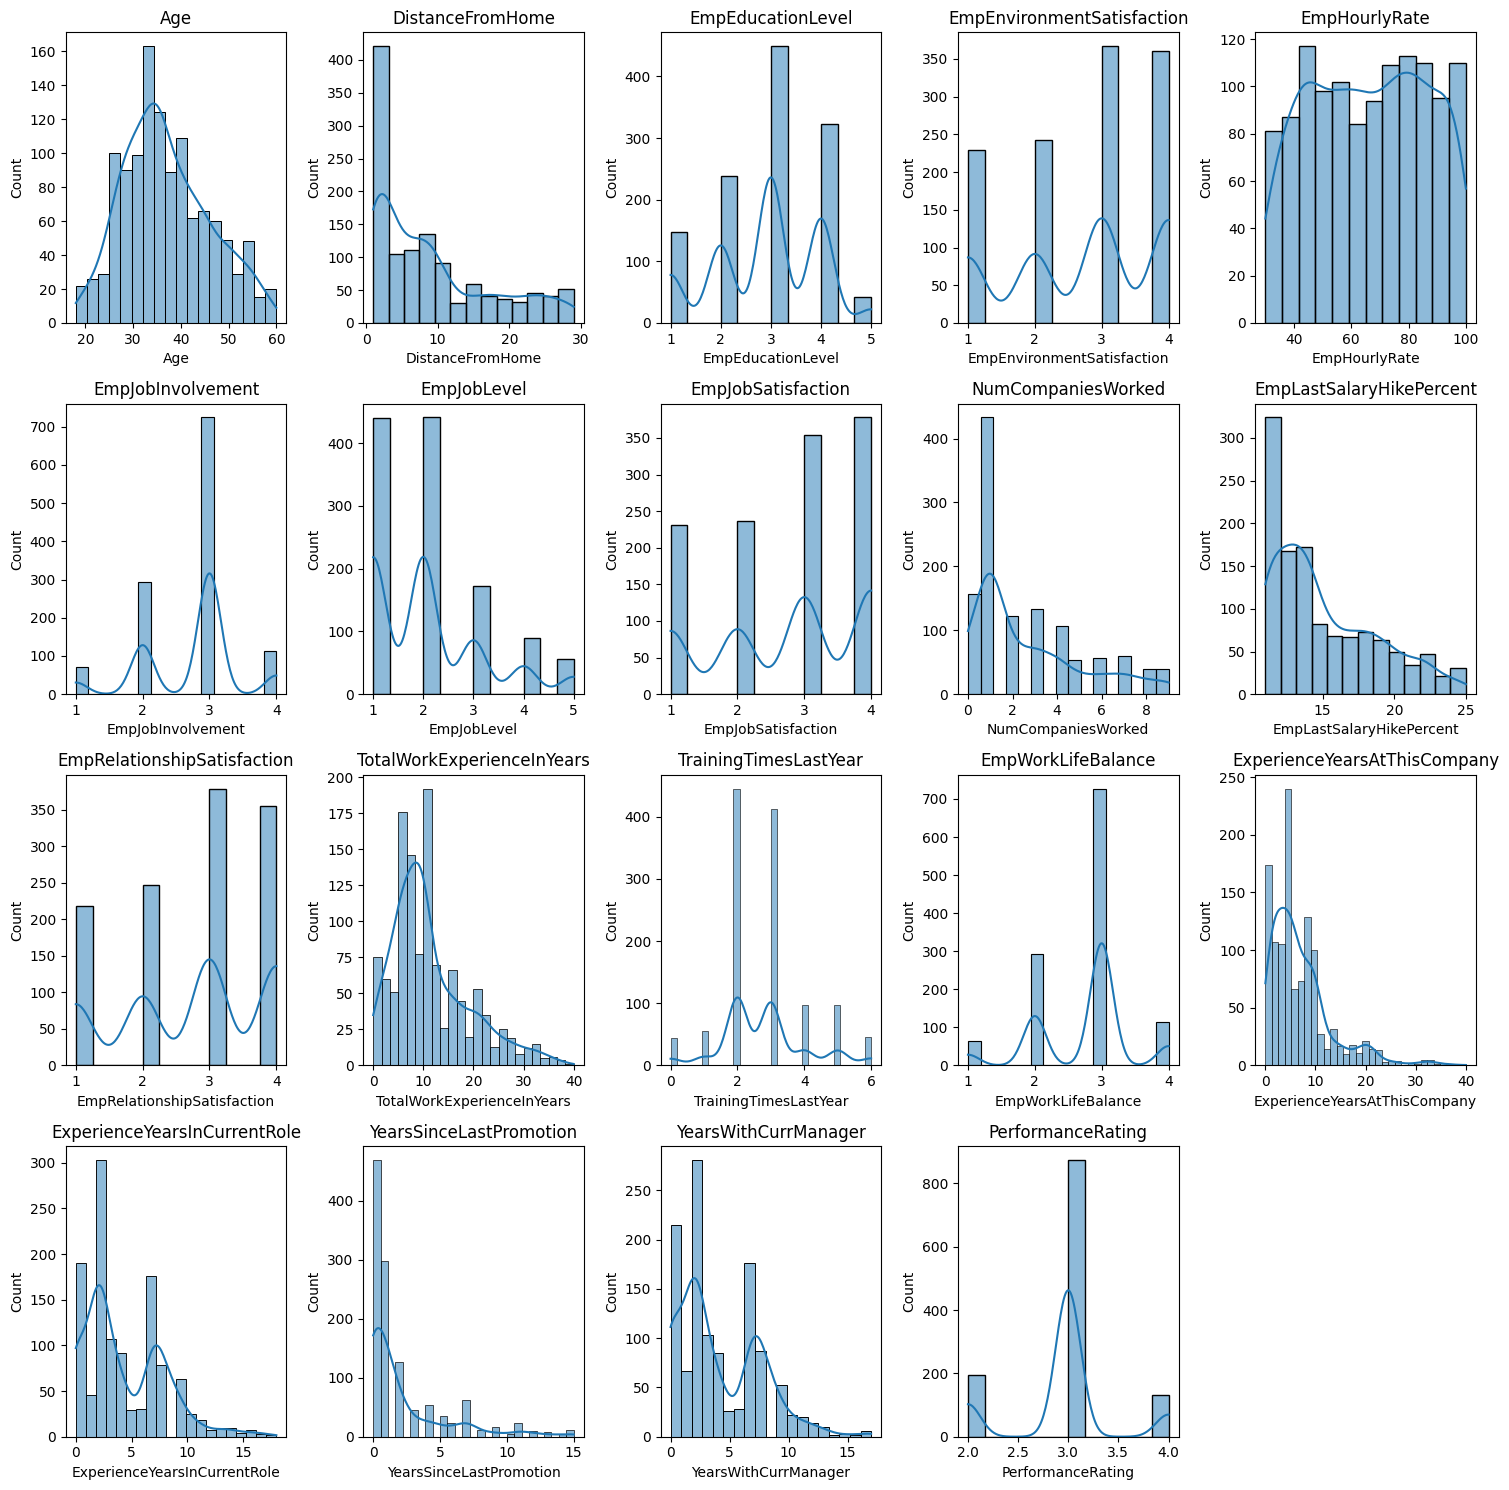

In [18]:
plt.figure(figsize=(15, 15))
plotnumber = 1

# Iterate through the column names in data1_num
for i in numerical:
    plt.subplot(4, 5, plotnumber)
    sns.histplot(x=data[i], kde=True)  # Use data1[col] to pass the numeric data for the x-axis
    plt.title(i)  # Set the title of the subplot as the column name
    plotnumber += 1

plt.tight_layout()
plt.show()


- The graphs reveal that most employees are mid-career professionals (ages 30-40) with 10 years of work experience and short tenures at the current company (0-10 years).

- Employees report high job satisfaction, environment satisfaction, and work-life balance, indicating a positive workplace.

- Promotions are frequent, with many employees promoted within the last 0-3 years, and most have 0-5 years in their current role or under their current manager.

- Salary hikes are typically 10-20%, and most employees worked at 1-2 companies previously.

- Performance ratings are concentrated at 3, reflecting satisfactory performance overall.

- Key influential features include **YearsSinceLastPromotion, ExperienceYearsAtThisCompany, and Work-Life Balance.**

#### **2. Categorical Columns**



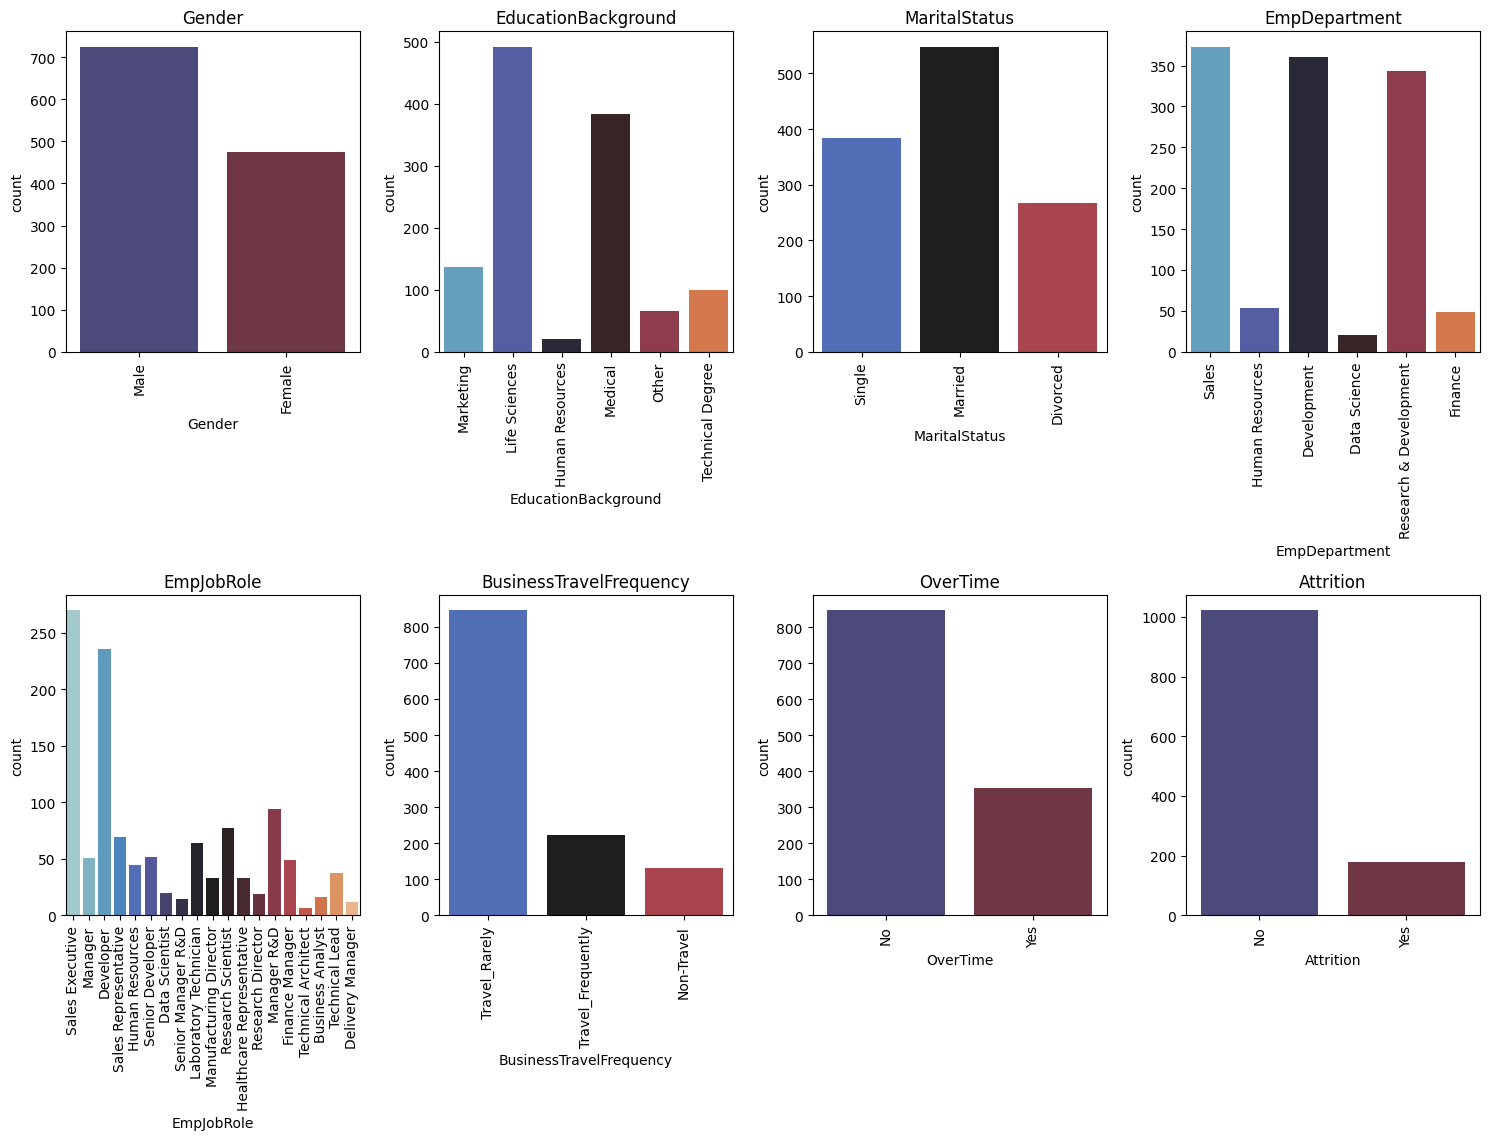

In [167]:
plt.figure(figsize=(15, 15))
plotnumber = 1

# Iterate through the column names in categorical
for i in category:
    plt.subplot(3,4,plotnumber)
    sns.countplot(x=data[i],palette='icefire')
    plt.xticks(rotation=90)
    plt.title(i)  # Set the title of the subplot as the column name
    plotnumber += 1

plt.tight_layout()
plt.show()

- The workforce is predominantly male, with most employees having a Life Sciences or Medical background and working in the Research & Development department in roles like Sales Executive or Research Scientist.

- Employees are typically mid-career (30-40 years) with around 10 years of experience, reporting high job satisfaction and good work-life balance. Business travel is mostly rare, and overtime is uncommon.

- Attrition, while low, may be influenced by factors like **Overtime, Department, Job Role, and YearsSinceLastPromotion**, which are critical features for workforce dynamics.








# **Bi-Variate Analysis**

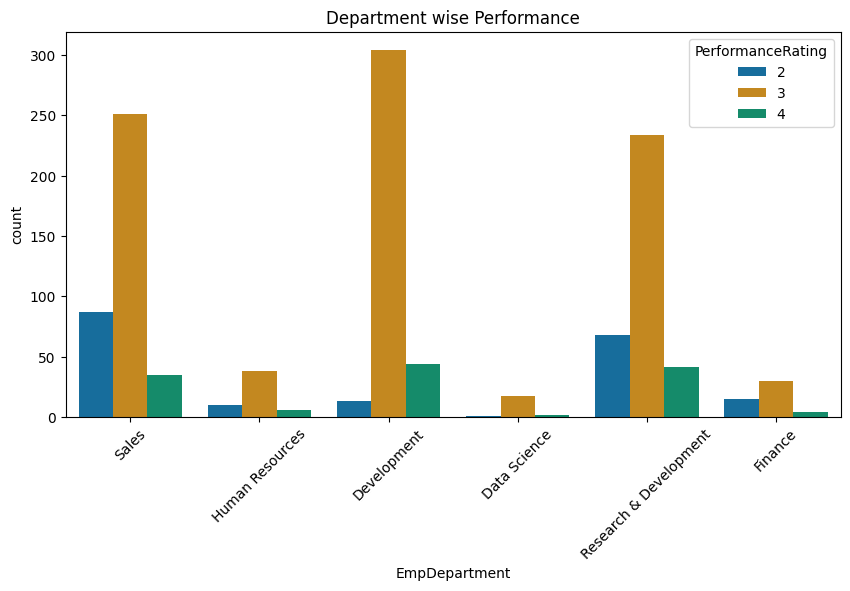

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=data, palette='colorblind')
plt.xticks(rotation=45)
plt.title("Department wise Performance")
plt.show()


**The "Development" department has the most employees, predominantly with a performance rating of 3, making it the key contributor. Sales and Research & Development also have significant representation, mainly with rating 3. Other departments like Data Science, HR, and Finance have fewer employees, with performance rating 3 being the most common across all departments.**

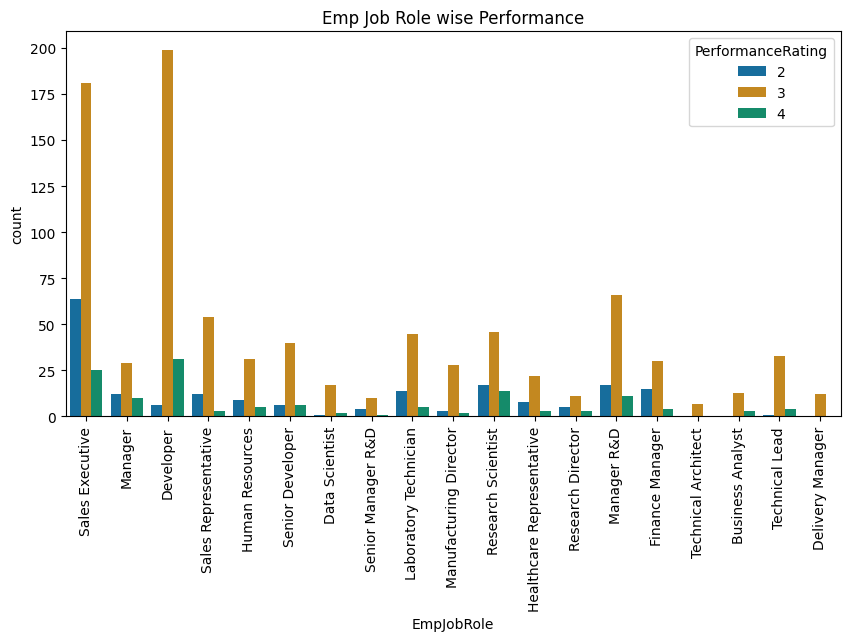

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpJobRole', hue='PerformanceRating', data=data, palette='colorblind')
plt.xticks(rotation=90)
plt.title("Emp Job Role wise Performance")
plt.show()


**"Developer" and "Sales Executive" roles have the highest employee count, primarily with a performance rating of 3. Most roles follow a similar trend, with rating 3 being the most common, while specialized roles like "Research Director" and "Finance Manager" have fewer employees and more evenly distributed ratings.**

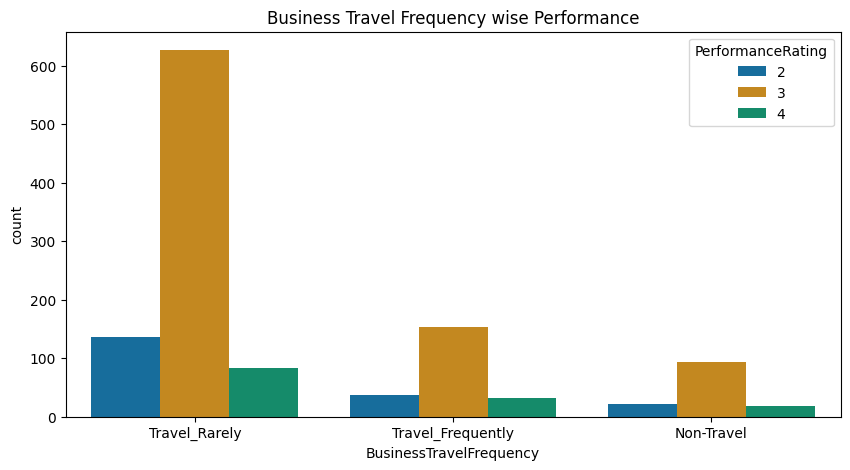

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x='BusinessTravelFrequency', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Business Travel Frequency wise Performance")
plt.show()


**Employees who "Travel_Rarely" dominate the workforce, primarily with a performance rating of 3. "Travel_Frequently" and "Non-Travel" employees are fewer, but rating 3 remains the most common across all categories, indicating it reflects the average performance level.**

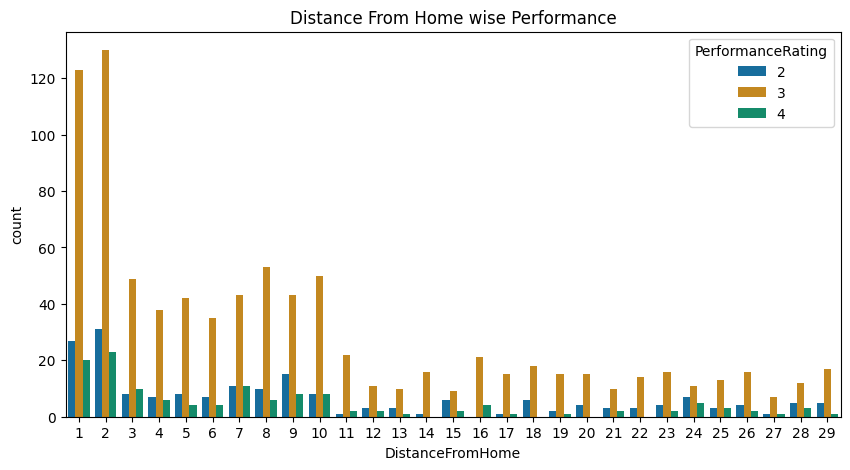

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='DistanceFromHome', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Distance From Home wise Performance")
plt.show()


**Employees living closer to work (1–4 units) are more frequent and tend to have higher performance ratings, particularly rating 3. As the distance increases, the number of employees and performance rating variations decrease significantly.**

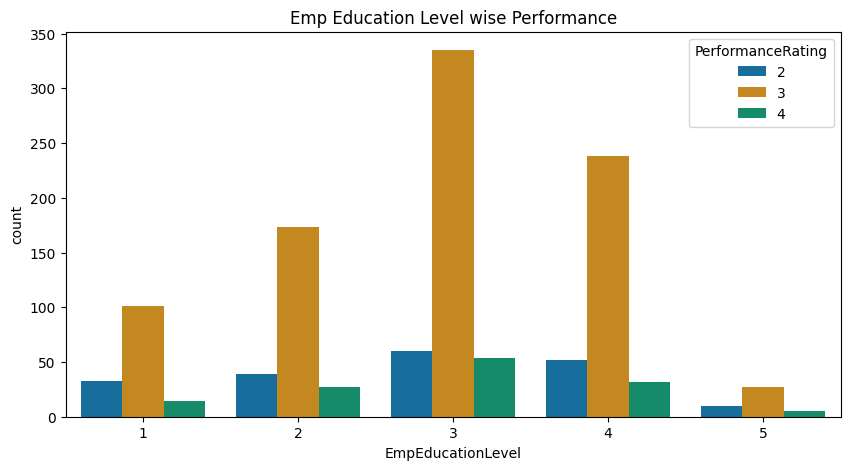

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpEducationLevel', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Education Level wise Performance")
plt.show()


**Employees with mid-level education (levels 3 and 4) are the most common and perform best, primarily with a performance rating of 3. Lower (1–2) and higher (5) education levels have fewer employees and less performance variation.**

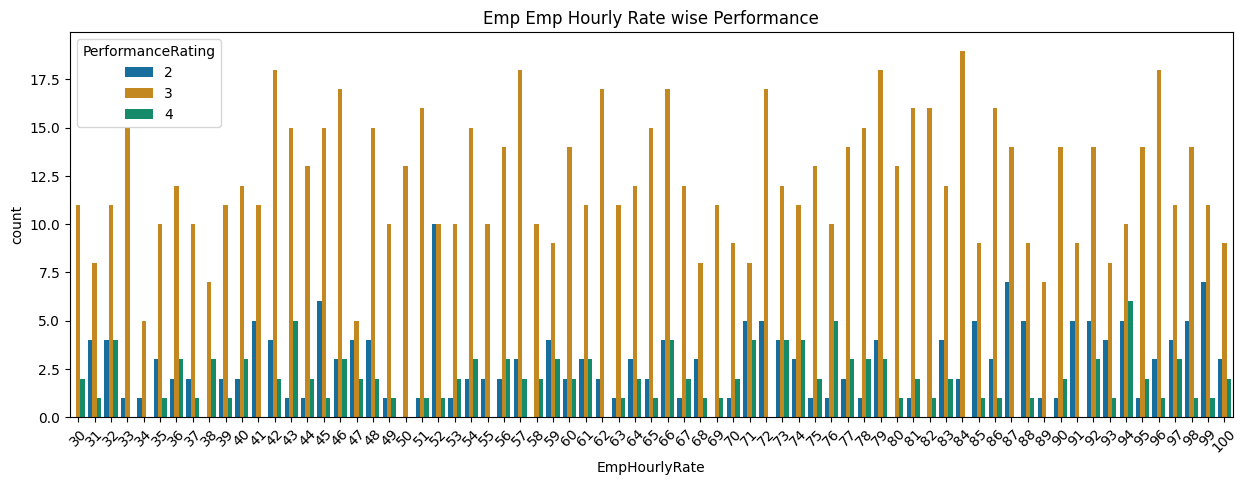

In [32]:
plt.figure(figsize=(15, 5))
sns.countplot(x='EmpHourlyRate', hue='PerformanceRating', data=data, palette='colorblind')
plt.xticks(rotation=45)
plt.title("Emp Emp Hourly Rate wise Performance")
plt.show()


**Performance rating 3 is consistently the most common across all hourly rates, while ratings 2 and 4 are less frequent. Hourly rates show no clear impact on performance ratings.**

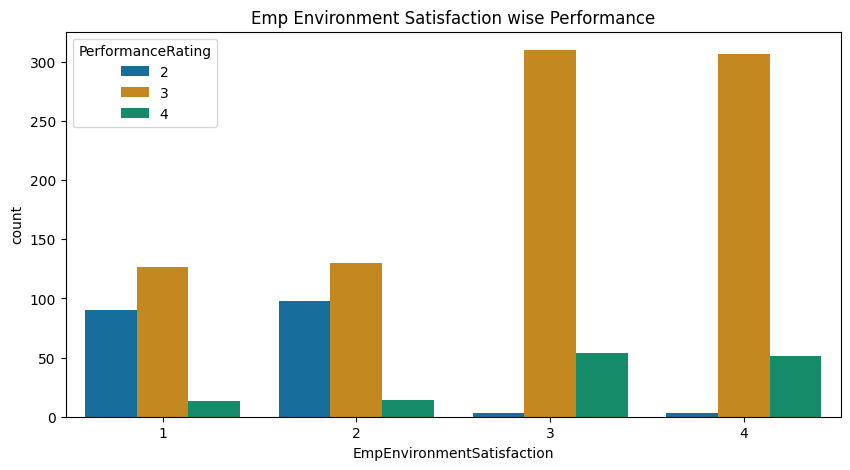

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpEnvironmentSatisfaction', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Environment Satisfaction wise Performance")
plt.show()

**Employees with higher environment satisfaction (levels 3 and 4) tend to perform slightly better, but most employees consistently receive a performance rating of 3 regardless of satisfaction. Improving environment satisfaction could slightly increase high-performance ratings.**

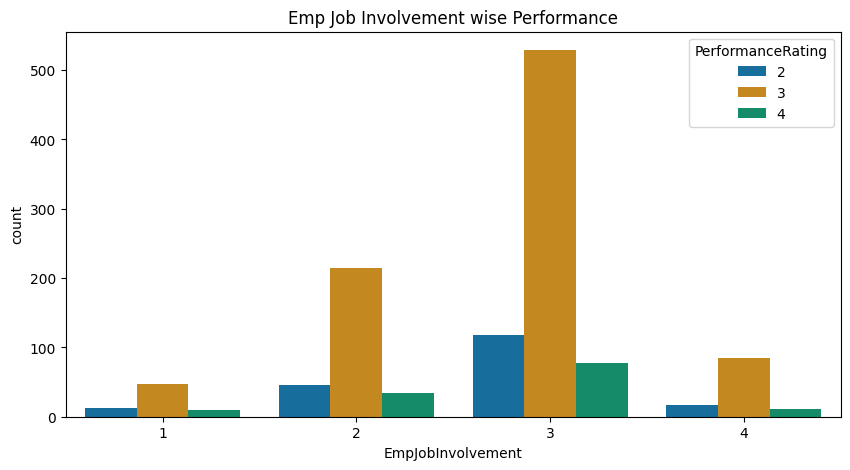

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpJobInvolvement', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Job Involvement wise Performance")
plt.show()


**Higher job involvement (level 4) leads to better performance, with more employees achieving rating 4. Most employees at moderate involvement (level 3) receive rating 3, while lower involvement levels (1 and 2) are associated with lower performance ratings (2 or 3).**

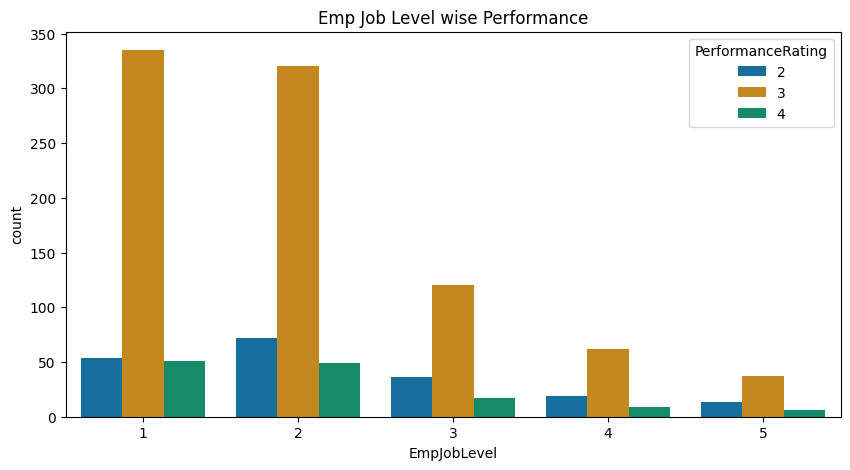

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpJobLevel', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Job Level wise Performance")
plt.show()

**Lower job levels (1 and 2) have the most employees, predominantly with performance rating 3. Higher job levels (3 to 5) have fewer employees but show a slight increase in high-performance ratings (4), though rating 3 remains dominant overall.**

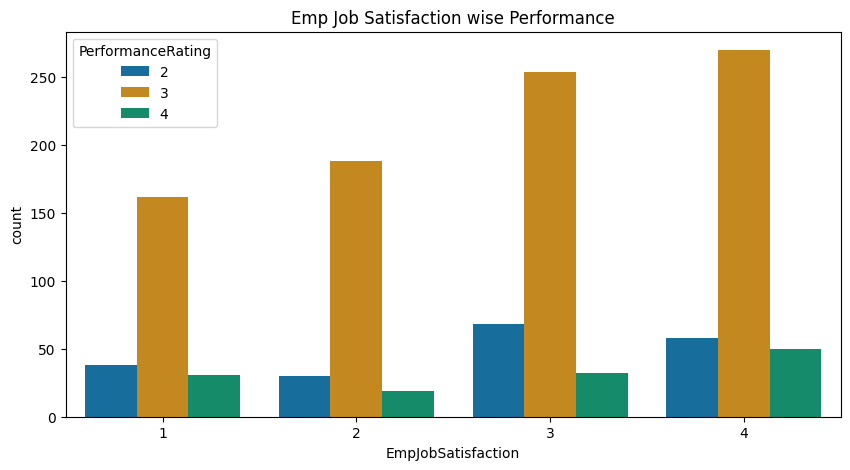

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpJobSatisfaction', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Job Satisfaction wise Performance")
plt.show()


**Higher job satisfaction (levels 3 and 4) is associated with better performance ratings, particularly with a dominant rating of 3. Improving job satisfaction may enhance employee performance.**

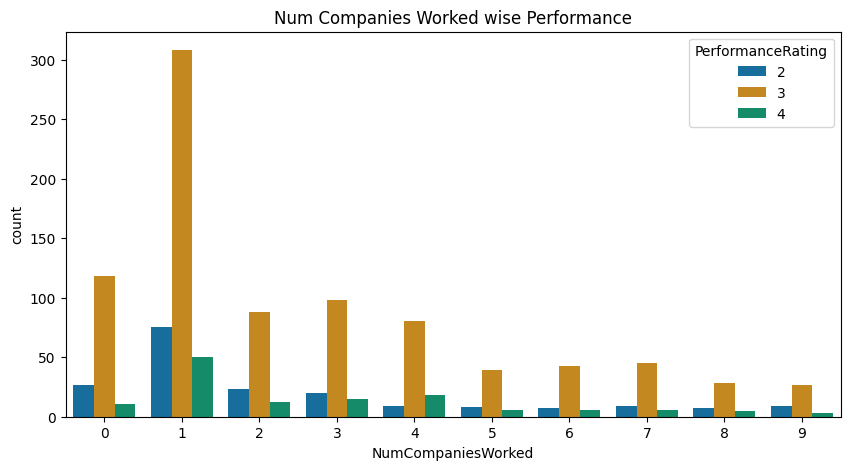

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x='NumCompaniesWorked', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Num Companies Worked wise Performance")
plt.show()


**Employees with experience at 1 company show the highest performance ratings, especially a rating of 3. Performance ratings decline as the number of companies worked increases.**

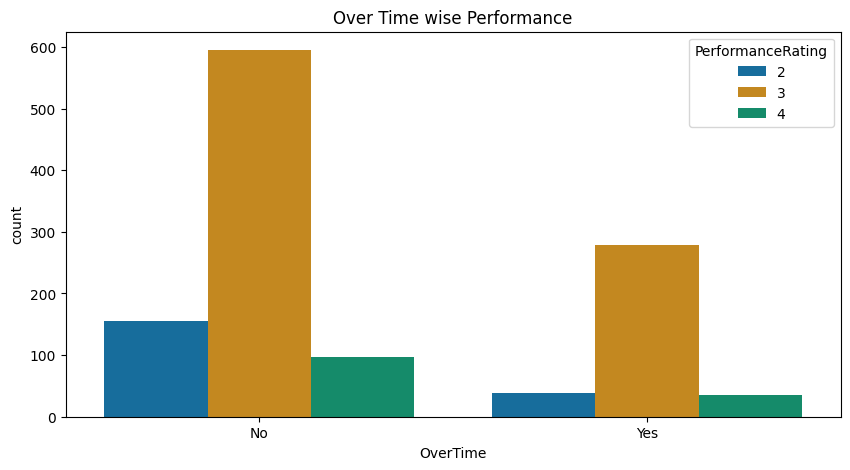

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x='OverTime', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Over Time wise Performance")
plt.show()


**Employees who do not work overtime have higher performance ratings, especially a rating of 3, while those working overtime show lower performance overall.**

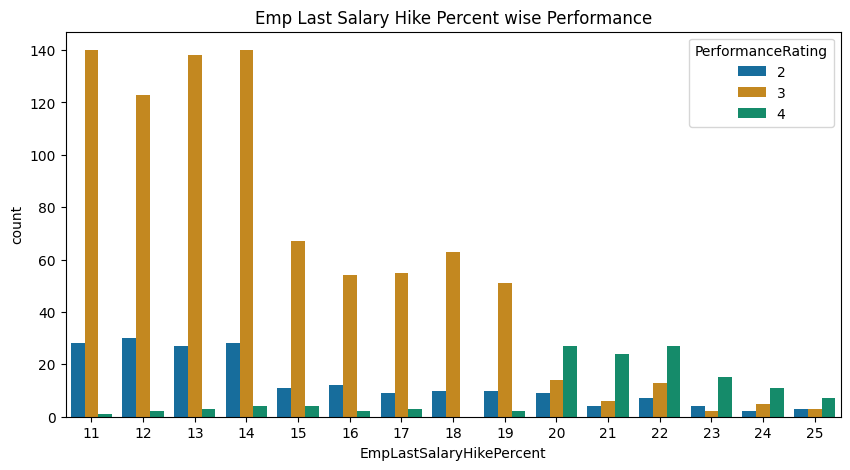

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpLastSalaryHikePercent', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Last Salary Hike Percent wise Performance")
plt.show()

**Most employees have a performance rating of 3, primarily at lower salary hikes (11%-14%). Higher salary hikes (19%-25%) are associated with a performance rating of 4, reflecting rewards for better performance, while rating 2 is uncommon.**

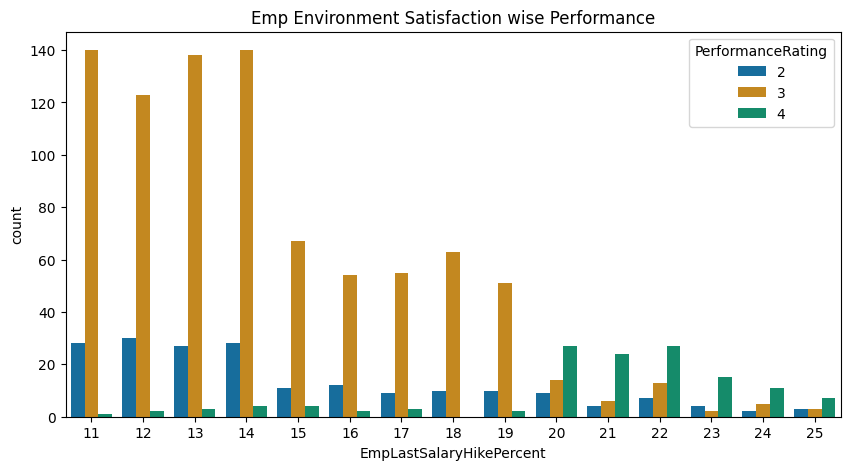

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpLastSalaryHikePercent', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Environment Satisfaction wise Performance")
plt.show()

**Performance rating 3 is most common, particularly for salary hikes of 11%-14%. Higher hikes (20%+) are linked to rating 4, rewarding top performers, while rating 2 is rare across all hike ranges.**

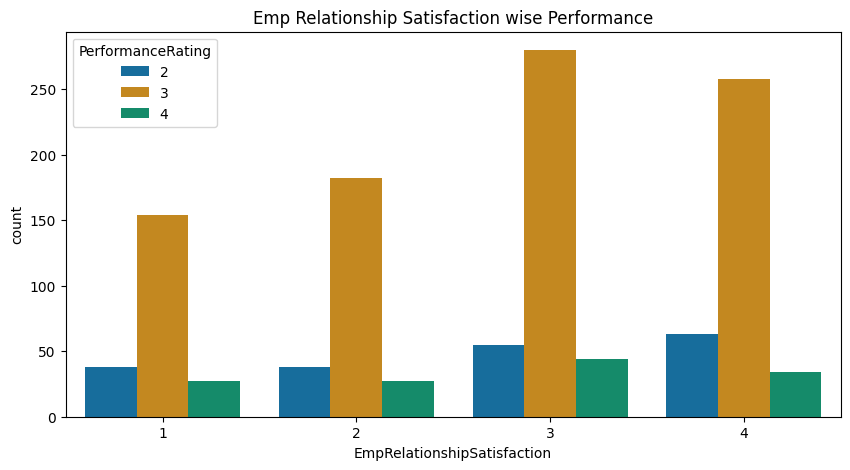

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpRelationshipSatisfaction', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Relationship Satisfaction wise Performance")
plt.show()


**Performance rating 3 is the most common across all relationship satisfaction levels, while ratings 2 and 4 are consistently low. Relationship satisfaction levels do not significantly impact the overall distribution of performance ratings.**

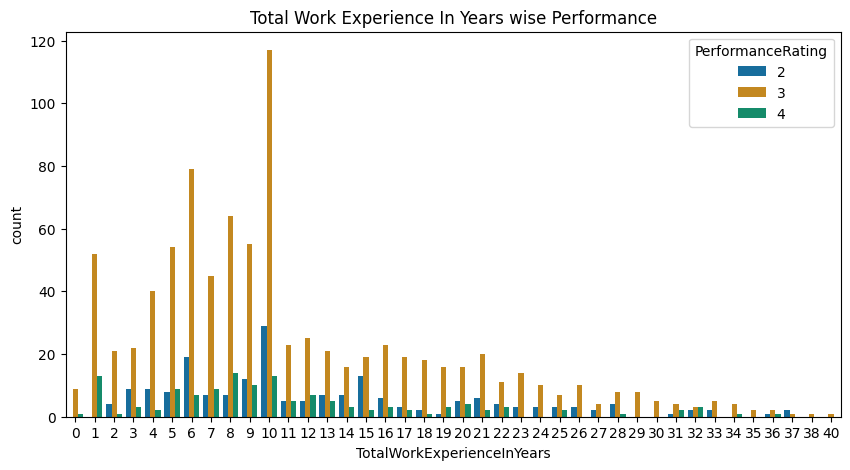

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(x='TotalWorkExperienceInYears', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Total Work Experience In Years wise Performance")
plt.show()

**Most employees have a performance rating of 3, with the highest concentration at 10 years of experience. Ratings of 2 and 4 are less frequent. The majority of employees have 0–15 years of experience, and the workforce size declines with higher experience levels.**

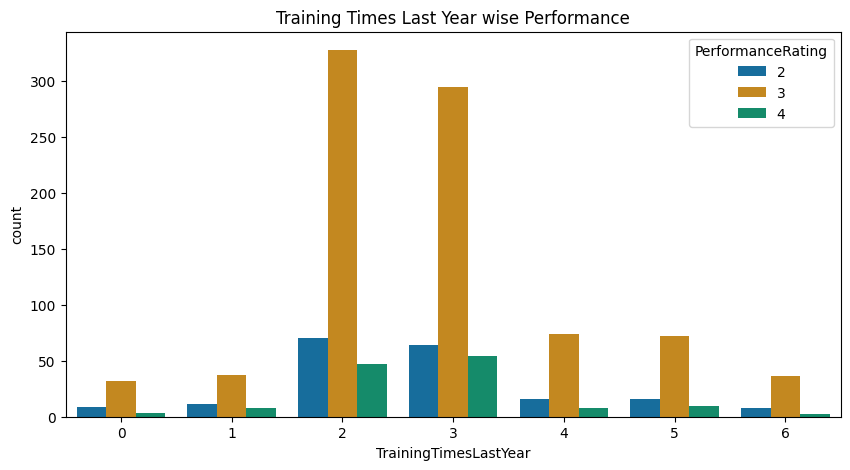

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(x='TrainingTimesLastYear', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Training Times Last Year wise Performance")
plt.show()

**Employees with 2–3 training sessions per year dominate and often achieve a performance rating of 3. Higher ratings are less frequent with fewer or more training sessions, while excessive or minimal training correlates with lower employee counts.**

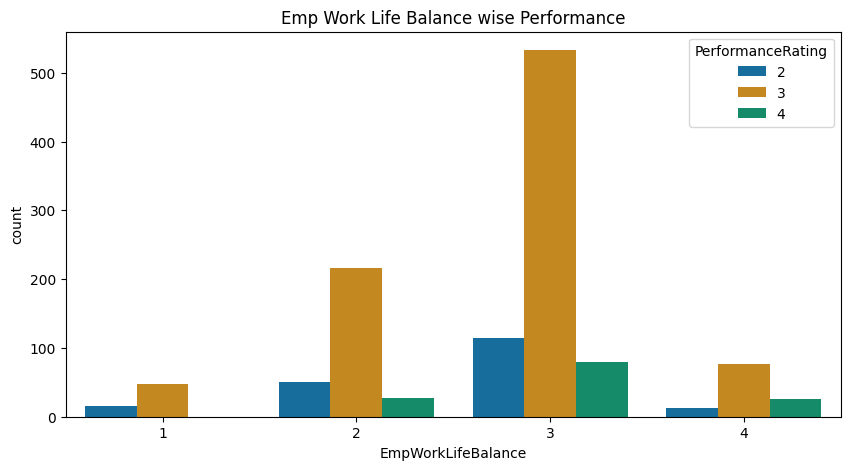

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpWorkLifeBalance', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Emp Work Life Balance wise Performance")
plt.show()

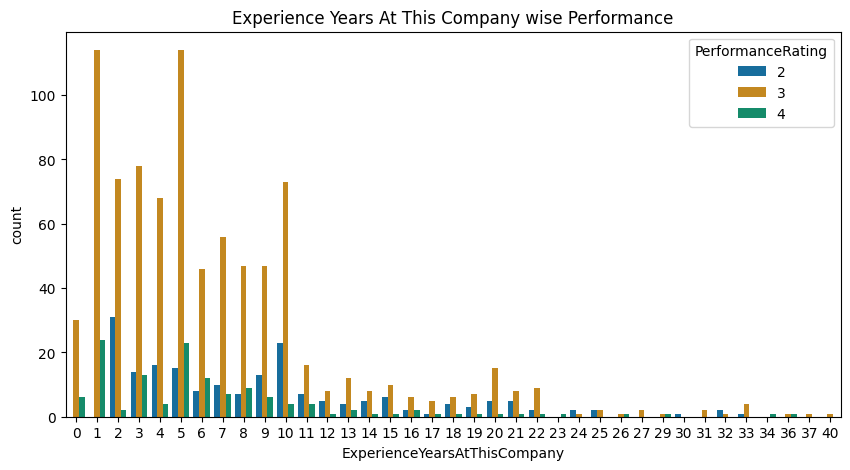

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x='ExperienceYearsAtThisCompany', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Experience Years At This Company wise Performance")
plt.show()

**Employees with a work-life balance of 3 are the majority and most often achieve a performance rating of 3. Better work-life balance (3 or 4) is linked to higher performance, while poor balance (1) has the fewest employees.**

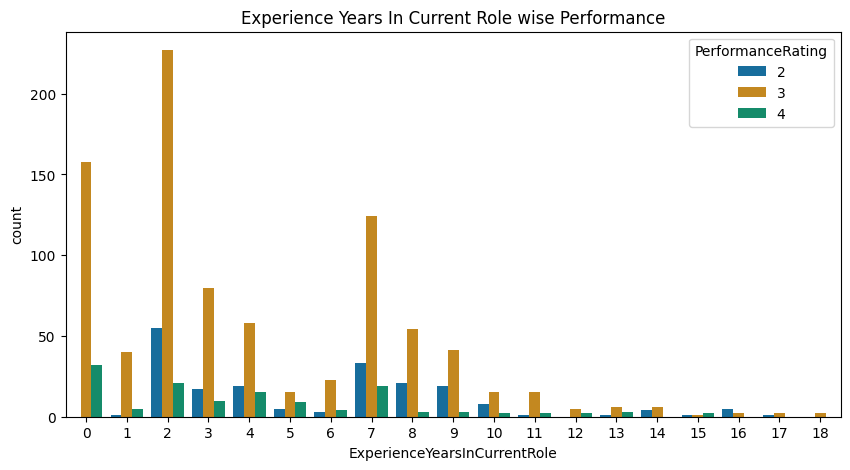

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x='ExperienceYearsInCurrentRole', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Experience Years In Current Role wise Performance")
plt.show()

**Most employees consistently achieve an average performance rating (3), with those having 2 years of experience in their current role being the largest group. Higher (4) and lower (2) ratings are rare across all experience levels.**

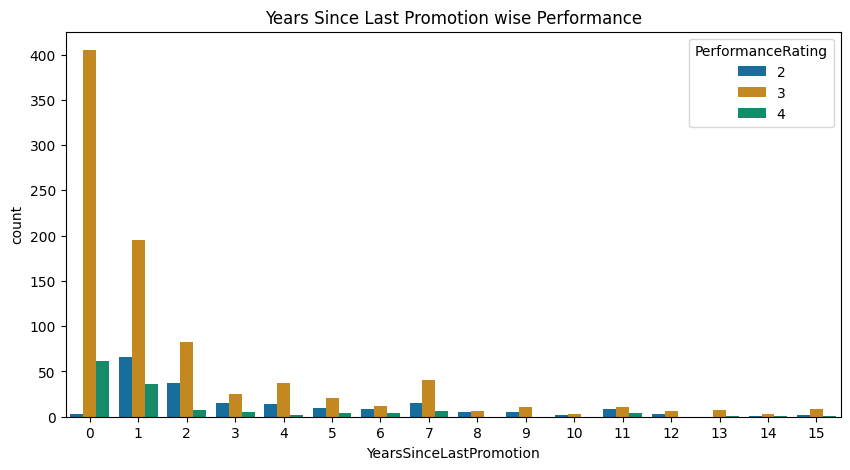

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(x='YearsSinceLastPromotion', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Years Since Last Promotion wise Performance")
plt.show()

**Most employees have a performance rating of 3, with the highest concentration in their first 3 years in the role. Employee count and high performance (rating 4) decline as experience increases.**

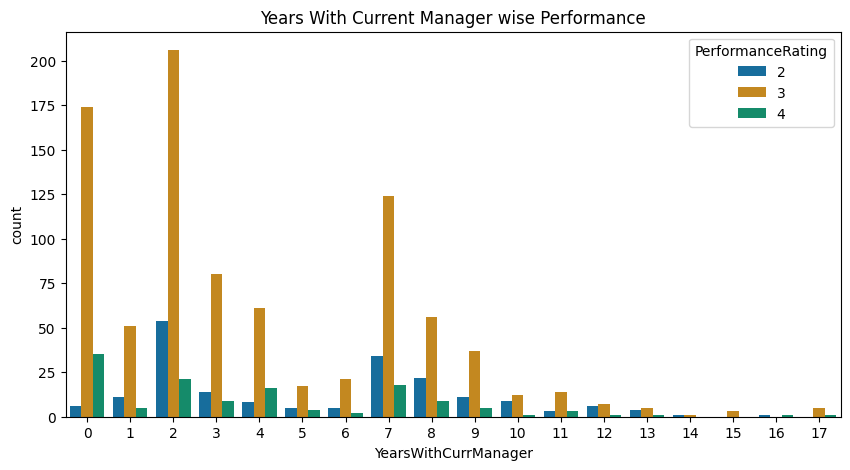

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(x='YearsWithCurrManager', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Years With Current Manager wise Performance")
plt.show()


**Most employees have a performance rating of 3, especially in the first 2 years with their current manager. Performance declines and employee count drops significantly after 7 years, with high ratings (4) remaining rare throughout.**

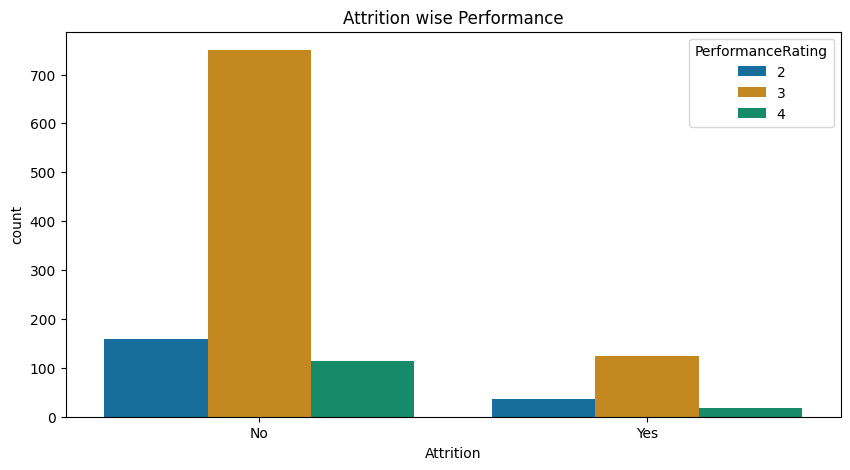

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Attrition', hue='PerformanceRating', data=data, palette='colorblind')
plt.title("Attrition wise Performance")
plt.show()


**Most employees with a performance rating of 3 do not experience attrition, while attrition is generally low across all ratings. High performers (rating 4) rarely leave, indicating strong retention among top-rated employees**

### **Bi-Variate Analysis Conclusion:**
The analysis reveals performance rating 3 as the most common, reflecting average performance across the workforce. Key features influencing performance include **department** (Development and key roles like "Developer"), **travel frequency** (rare travel boosts stability), **distance from work** (closer proximity correlates with better performance), **job involvement** (high involvement improves ratings), and **salary hikes** (higher hikes reward top performers). Factors like **work-life balance** (better balance leads to higher ratings), **environment satisfaction**, and **training frequency** (2–3 sessions annually) also play significant roles. Addressing these areas can enhance performance, retention, and overall satisfaction.

# **1. Analysis of Department wise Perfomance**

In [ ]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [ ]:
dept_per.sample(10)

,EmpDepartment,PerformanceRating
495,Sales,2
300,Research & Development,3
1072,Sales,3
82,Development,3
1105,Data Science,3
551,Research & Development,3
989,Development,3
938,Development,3
1049,Development,3
395,Research & Development,3


In [ ]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

,PerformanceRating
EmpDepartment,
Data Science,3.050000
Development,3.085873
Finance,2.775510
Human Resources,2.925926
Research & Development,2.921283
Sales,2.860590


In [ ]:
dept_per['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [ ]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

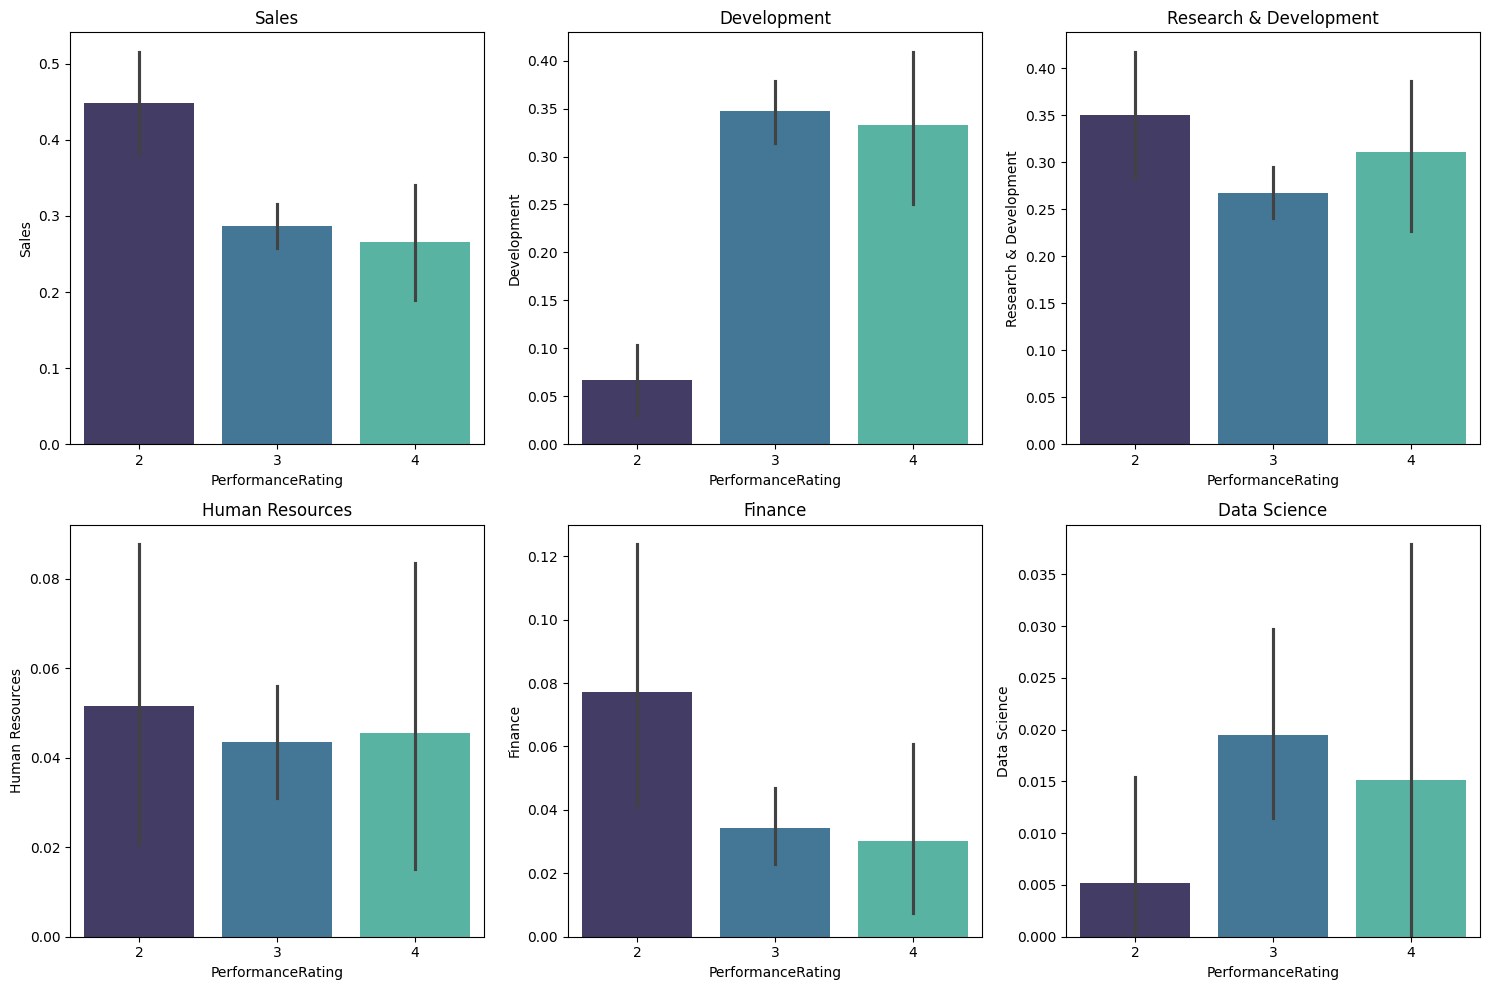

In [ ]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))

# Plot for Sales
plt.subplot(2, 3, 1)
sns.barplot(x='PerformanceRating', y='Sales', data=dept_rating, palette='mako')
plt.title('Sales')

# Plot for Development
plt.subplot(2, 3, 2)
sns.barplot(x='PerformanceRating', y='Development', data=dept_rating, palette='mako')
plt.title('Development')

# Plot for Research & Development
plt.subplot(2, 3, 3)
sns.barplot(x='PerformanceRating', y='Research & Development', data=dept_rating, palette='mako')
plt.title('Research & Development')

# Plot for Human Resources
plt.subplot(2, 3, 4)
sns.barplot(x='PerformanceRating', y='Human Resources', data=dept_rating,palette='mako')
plt.title('Human Resources')

# Plot for Finance
plt.subplot(2, 3, 5)
sns.barplot(x='PerformanceRating', y='Finance', data=dept_rating,palette='mako')
plt.title('Finance')

# Plot for Data Science
plt.subplot(2, 3, 6)
sns.barplot(x='PerformanceRating', y='Data Science', data=dept_rating,palette='mako')
plt.title('Data Science')

plt.tight_layout()
plt.show()



- The graphs indicate that **Development and Research & Development departments** have a higher proportion of employees achieving better performance ratings (3 and 4), whereas departments like Sales and Finance show a broader distribution with lower ratings being more common.
- Specialized departments like Data Science and HR have fewer employees and evenly distributed ratings.
- The **Development department** stands out as a key contributor to high performance.
- The most important feature here is **department**, as it significantly influences performance rating trends.

# **Feature Selection**
# **2. Top 3 Important Factors effecting employee performance**

In [102]:
# copying the data
data1 = data.copy()

In [103]:
# dropping the column emp number
data1 = data1.drop('EmpNumber',axis=1)
data1.columns


Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [104]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [105]:
# Converting categorical to numerical
data1.Age=enc.fit_transform(data1.Age)
data1.Attrition=enc.fit_transform(data1.Attrition)
data1.OverTime=enc.fit_transform(data1.OverTime)
data1.BusinessTravelFrequency=enc.fit_transform(data1.BusinessTravelFrequency)
data1.EmpJobRole=enc.fit_transform(data1.EmpJobRole)
data1.EmpDepartment=enc.fit_transform(data1.EmpDepartment)
data1.MaritalStatus =enc.fit_transform(data1.MaritalStatus )
data1.EducationBackground=enc.fit_transform(data1.EducationBackground)
data1.Gender =enc.fit_transform(data1.Gender )


### **Checking for the Outlier**

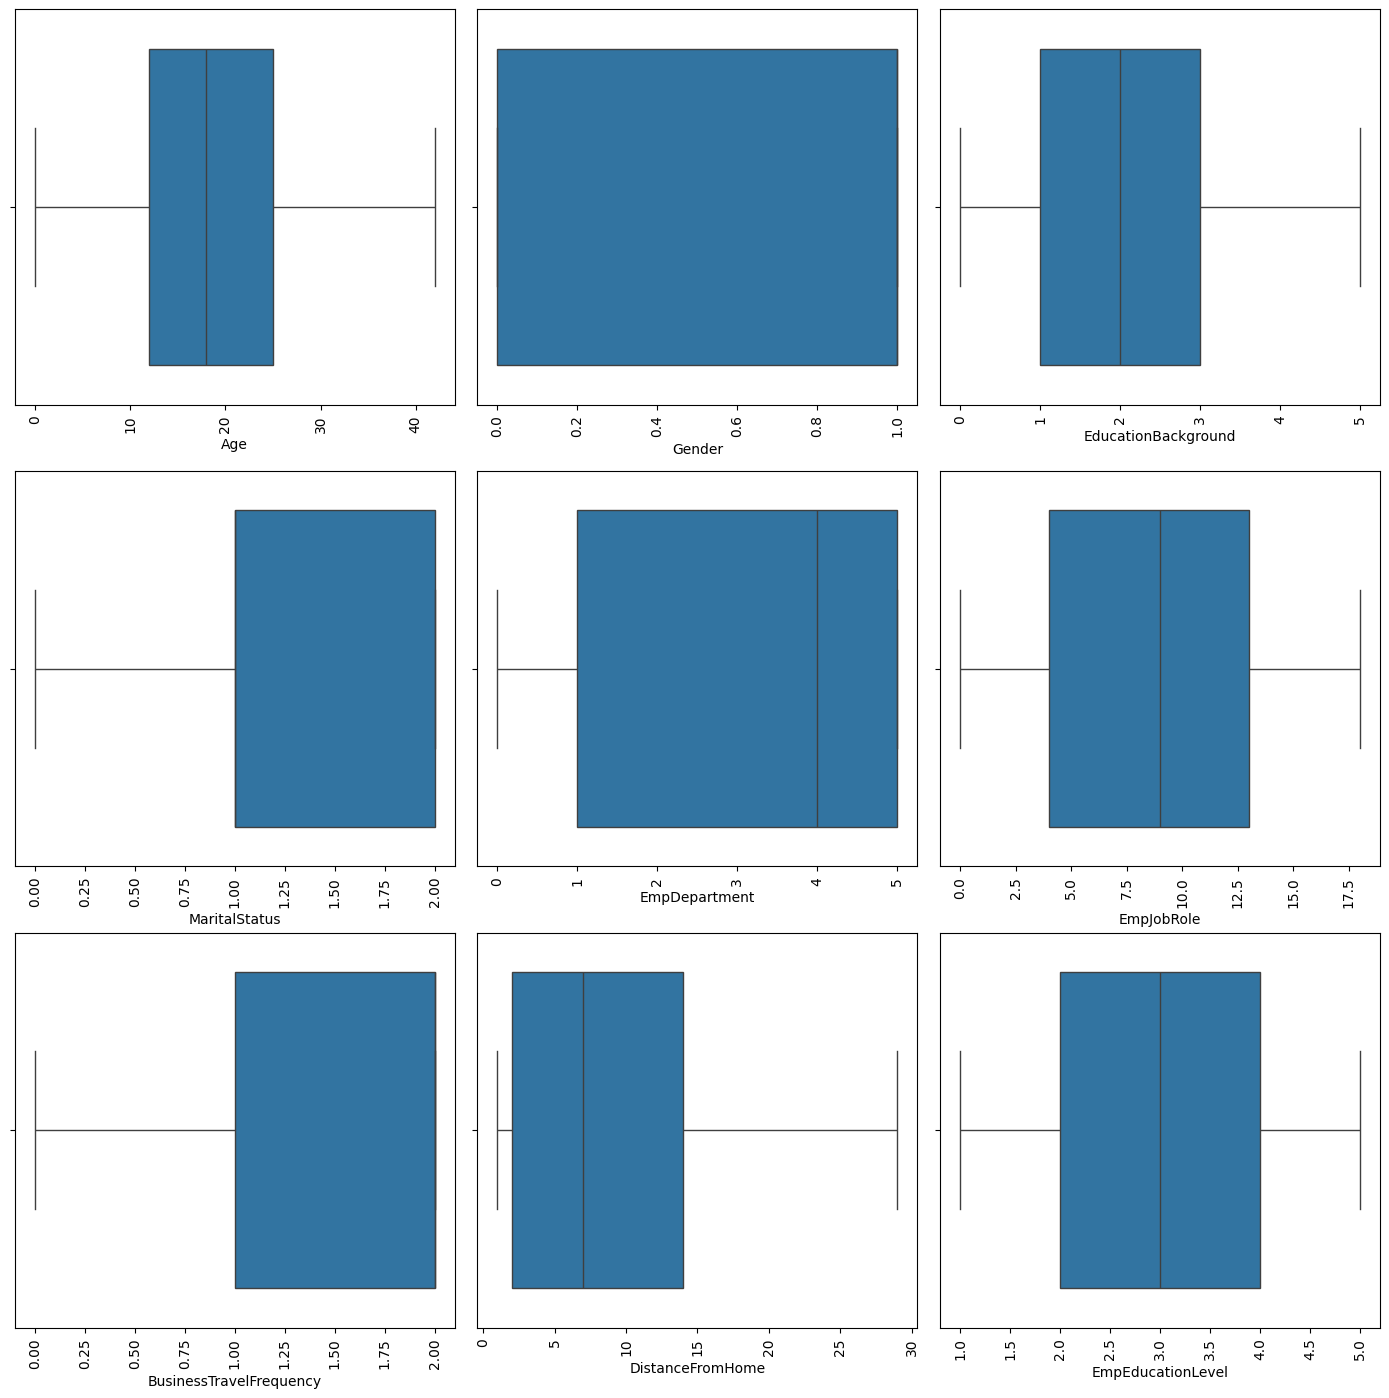

In [165]:
plt.figure(figsize=(14, 14))
plotnumber = 1

for i in data1:
    plt.subplot(3, 3, plotnumber)
    plt.xticks(rotation=90)
    sns.boxplot(x=data1[i])
    plotnumber += 1
    if plotnumber > 9:
        break

plt.tight_layout()
plt.show()

**From the above analysis we are able to see no outliers found**

In [106]:
# Calculate the correlation matrix
corr_matrix = data1.corr()

# Display the correlation matrix
corr_matrix

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


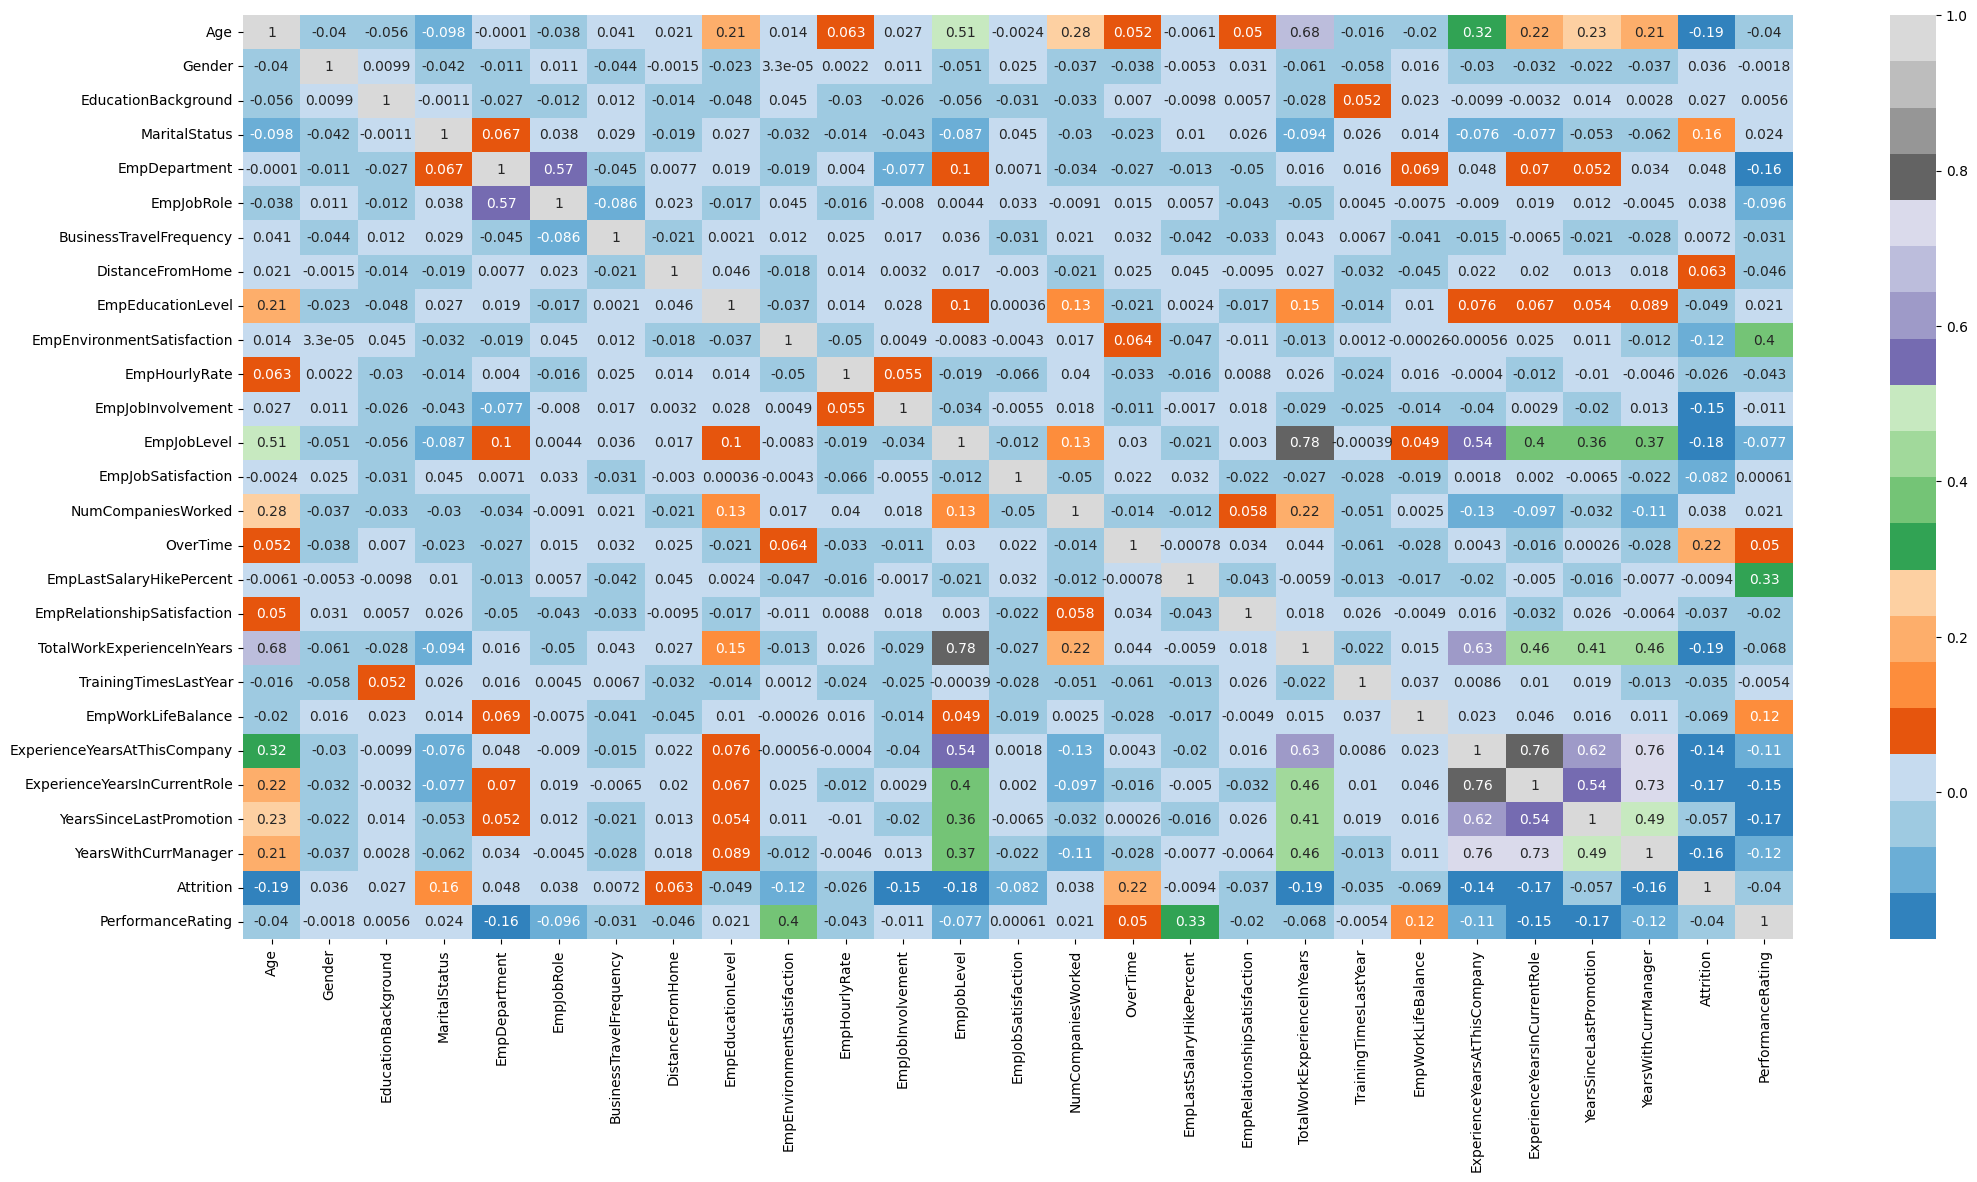

In [107]:
plt.figure(figsize=(25,12))
sns.heatmap(corr_matrix,annot=True,cmap='tab20c')
plt.show()


In [101]:
correlation_matrix = data1.corr()

# Select the target variable (PerformanceRating) correlation values
target_corr = correlation_matrix['PerformanceRating']

# Drop the correlation of PerformanceRating with itself
target_corr = target_corr.drop(labels=['PerformanceRating'])

# Identify the top 3 features most correlated with PerformanceRating
top_3_features = target_corr.abs().sort_values(ascending=False)

# Print the top 3 features
print("Features most correlated with PerformanceRating:")
top_3_features


Features most correlated with PerformanceRating:


,PerformanceRating
EmpEnvironmentSatisfaction,0.395561
EmpLastSalaryHikePercent,0.333722
YearsSinceLastPromotion,0.167629
EmpDepartment,0.162615
ExperienceYearsInCurrentRole,0.147638
EmpWorkLifeBalance,0.124429
YearsWithCurrManager,0.122313
ExperienceYearsAtThisCompany,0.111645
EmpJobRole,0.096209
EmpJobLevel,0.076632


### **Feature Selection:**

- There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1.

- Top **3 factors** which affect the employee performance are :  
  **1. Employee Environment Satisfaction**

  **2. Employee Last Salary Hike Percent**

  **3. Years Since Last Promotion**

# **Train and Test split data**

In [111]:
# Here we have selected only the important columns
y = data1.PerformanceRating

# Taking only variables with correlation coeffecient greater than 0.1
X = data1.iloc[:,[4,5,9,16,20,21,22,23,24]]

X.sample()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
950,1,3,3,12,3,5,4,1,4


In [112]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [113]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
X_train.shape

(840, 9)

In [115]:
X_test.shape

(360, 9)

# **3. Model Iterations**

## **1. Logistic Regression**





In [120]:
# Training the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           2       0.65      0.48      0.55        63
           3       0.86      0.94      0.90       264
           4       0.81      0.67      0.73        33

    accuracy                           0.83       360
   macro avg       0.78      0.69      0.73       360
weighted avg       0.82      0.83      0.82       360



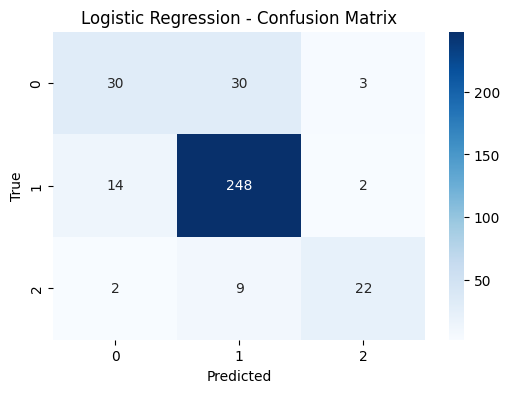

Train F1 Score (Micro) for Logistic Regression is : 0.825
Test F1 Score (Micro) for Logistic Regression is : 0.8333333333333334
The Roc_Auc score for Logistic Regression is : 0.9181802826229218


In [123]:
# Predictions for test and train sets
pred_1 = model_lr.predict(X_test)
train_pred_1 = model_lr.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_1))

# Confusion matrix
cm = confusion_matrix(y_test, pred_1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, train_pred_1, average='micro')
score_1 = f1_score(y_test, pred_1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Logistic Regression is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Logistic Regression is : {}'.format(score_1))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, model_lr.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for Logistic Regression is : {}'.format(roc_auc))

## **2. Support Vector Classifier**

In [127]:
# Training the model
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', C=100, probability=True, random_state=10).fit(X_train,y_train)

              precision    recall  f1-score   support

           2       0.74      0.78      0.76        63
           3       0.92      0.88      0.90       264
           4       0.54      0.67      0.59        33

    accuracy                           0.84       360
   macro avg       0.73      0.78      0.75       360
weighted avg       0.85      0.84      0.85       360



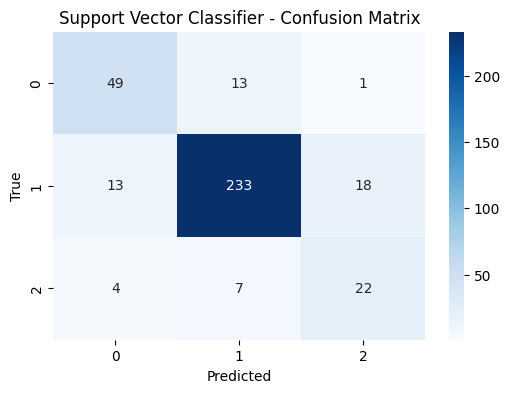

Train F1 Score (Micro) for Support Vector Classifier  is : 0.9892857142857143
Test F1 Score (Micro) for Support Vector Classifier  is : 0.8444444444444444
The Roc_Auc score for Support Vector Classifier  is : 0.9090574354136726


In [128]:
# Predictions for test and train sets
pred_2 = model_svc.predict(X_test)
train_pred_2 = model_svc.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_2))

# Confusion matrix
cm = confusion_matrix(y_test, pred_2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_2 = f1_score(y_train, train_pred_2, average='micro')
score_2 = f1_score(y_test, pred_2, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Support Vector Classifier  is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for Support Vector Classifier  is : {}'.format(score_2))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, model_svc.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for Support Vector Classifier  is : {}'.format(roc_auc))

# **3. Decision Tree with GridSearchCV**

In [129]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_dt=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

              precision    recall  f1-score   support

           2       0.85      0.83      0.84        63
           3       0.94      0.95      0.94       264
           4       0.75      0.73      0.74        33

    accuracy                           0.91       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.90      0.91      0.90       360



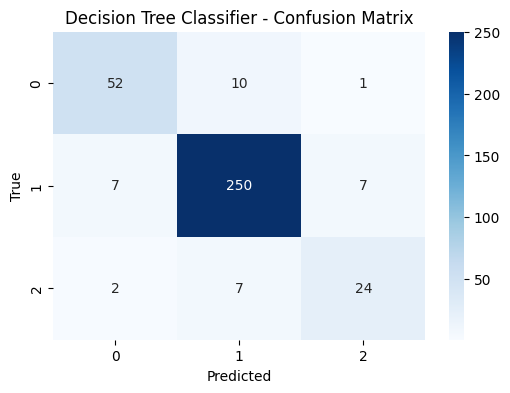

Train F1 Score (Micro) for Decision Tree Classifier is : 0.9821428571428571
Test F1 Score (Micro) for Decision Tree Classifier is : 0.9055555555555556
The Roc_Auc score for Decision Tree Classifier is : 0.879411155325401


In [130]:
# Predictions for test and train sets
pred_3 = model_dt.predict(X_test)
train_pred_3 = model_dt.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_3))

# Confusion matrix
cm = confusion_matrix(y_test, pred_3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_3 = f1_score(y_train, train_pred_3, average='micro')
score_3 = f1_score(y_test, pred_3, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Decision Tree Classifier is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for Decision Tree Classifier is : {}'.format(score_3))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, model_dt.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for Decision Tree Classifier is : {}'.format(roc_auc))

# **4. Random Forest with GridSearchCV**

In [131]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_rf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_rf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360



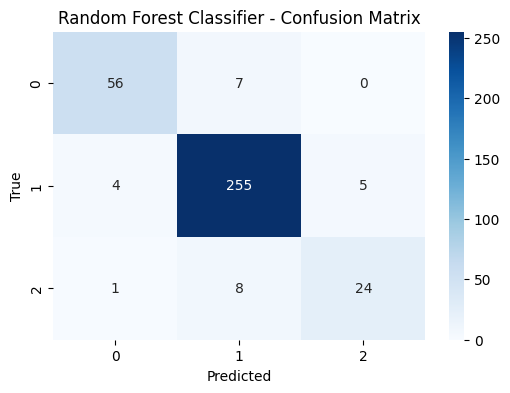

Train F1 Score (Micro) for Random Forest Classifier is : 0.9726190476190476
Test F1 Score (Micro) for Random Forest Classifier is : 0.9055555555555556
The Roc_Auc score for Random Forest Classifier is : 0.9624581668095938


In [132]:
# Predictions for test and train sets
pred_4 = model_rf.predict(X_test)
train_pred_4 = model_rf.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_4))

# Confusion matrix
cm = confusion_matrix(y_test, pred_4)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_4 = f1_score(y_train, train_pred_4, average='micro')
score_4 = f1_score(y_test, pred_3, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Random Forest Classifier is : {}'.format(train_score_4))
print('Test F1 Score (Micro) for Random Forest Classifier is : {}'.format(score_4))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for Random Forest Classifier is : {}'.format(roc_auc))

# **5. Naive Bayes Bernoulli**

In [133]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

              precision    recall  f1-score   support

           2       0.75      0.48      0.58        63
           3       0.80      0.97      0.88       264
           4       0.00      0.00      0.00        33

    accuracy                           0.79       360
   macro avg       0.52      0.48      0.49       360
weighted avg       0.72      0.79      0.74       360



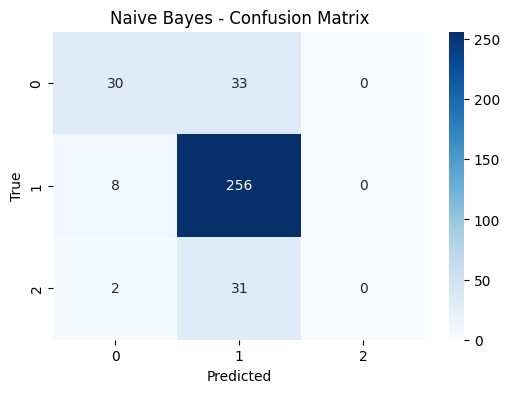

Train F1 Score (Micro) for Naive Bayes is : 0.7535714285714286
Test F1 Score (Micro) for Naive Bayes is : 0.7944444444444444
The Roc_Auc score for Naive Bayes is : 0.8728720120495891


In [135]:
# Predictions for test and train sets
pred_5 = model_nb.predict(X_test)
train_pred_5 = model_nb.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_5))

# Confusion matrix
cm = confusion_matrix(y_test, pred_5)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_5 = f1_score(y_train, train_pred_5, average='micro')
score_5 = f1_score(y_test, pred_5, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Naive Bayes is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for Naive Bayes is : {}'.format(score_5))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, model_nb.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for Naive Bayes is : {}'.format(roc_auc))

# **6. K-Nearest Neighbor**

In [136]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



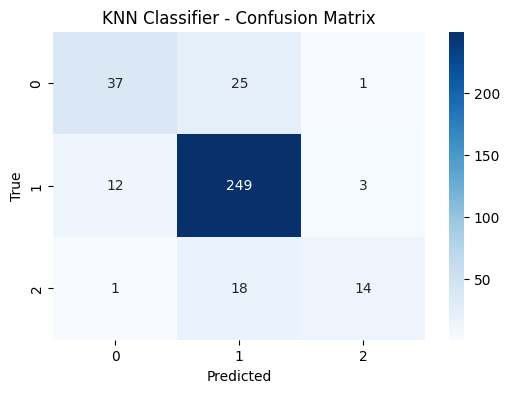

Train F1 Score (Micro) for KNN Classifier  is : 0.8642857142857143
Test F1 Score (Micro) for KNN Classifier  is : 0.8333333333333334
The Roc_Auc score for KNN Classifier  is : 0.9142374947868119


In [137]:
# Predictions for test and train sets
pred_6 = model_knn.predict(X_test)
train_pred_6 = model_knn.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_6))

# Confusion matrix
cm = confusion_matrix(y_test, pred_6)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_6 = f1_score(y_train, train_pred_6, average='micro')
score_6 = f1_score(y_test, pred_6, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for KNN Classifier  is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for KNN Classifier  is : {}'.format(score_6))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, model_knn.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for KNN Classifier  is : {}'.format(roc_auc))

# **7. XGBoost Classifier**

In [141]:
from xgboost import XGBClassifier


# Adjusting class labels in y_train and y_test
y_train_adjusted = y_train - 2
y_test_adjusted = y_test - 2

# Training the model
model_xgb = XGBClassifier(max_depth=27)
model_xgb.fit(X_train, y_train_adjusted)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        63
           1       0.94      0.95      0.95       264
           2       0.76      0.76      0.76        33

    accuracy                           0.92       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.92      0.92      0.92       360



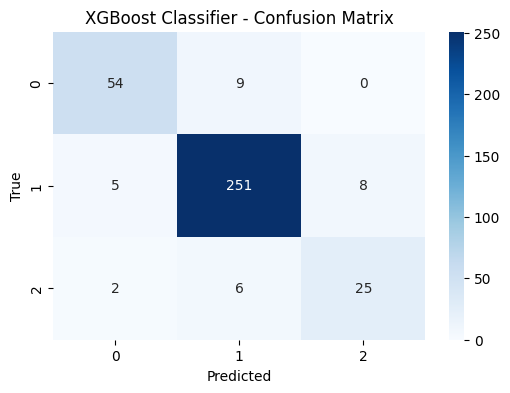

Train F1 Score (Micro) for XGBoost Classifier  is : 1.0
Test F1 Score (Micro) for XGBoost Classifier  is : 0.9166666666666666
The Roc_Auc score for XGBoost Classifier  is : 0.9711833794721154


In [142]:
# Predictions for test and train sets
pred_7 = model_xgb.predict(X_test)
train_pred_7 = model_xgb.predict(X_train)

# Classification report for test set
print(classification_report(y_test_adjusted, pred_7))

# Confusion matrix
cm = confusion_matrix(y_test_adjusted, pred_7)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_7 = f1_score(y_train_adjusted, train_pred_7, average='micro')
score_7 = f1_score(y_test_adjusted, pred_7, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for XGBoost Classifier  is : {}'.format(train_score_7))
print('Test F1 Score (Micro) for XGBoost Classifier  is : {}'.format(score_7))


# Print roc auc scores
roc_auc = roc_auc_score(y_test_adjusted, model_xgb.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for XGBoost Classifier  is : {}'.format(roc_auc))

# **8. Artificial Neural Network**

In [143]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_ann = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_ann.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

              precision    recall  f1-score   support

           2       0.84      0.76      0.80        63
           3       0.91      0.94      0.92       264
           4       0.68      0.64      0.66        33

    accuracy                           0.88       360
   macro avg       0.81      0.78      0.79       360
weighted avg       0.88      0.88      0.88       360



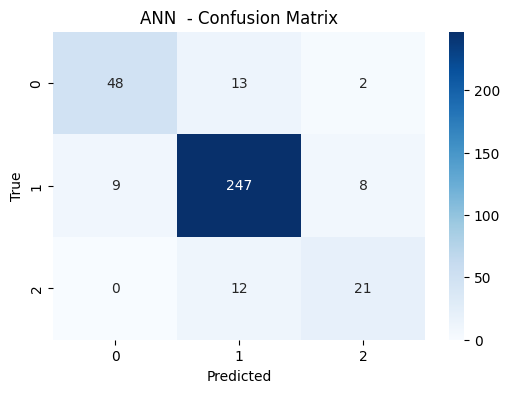

Train F1 Score (Micro) for ANN   is : 0.9714285714285714
Test F1 Score (Micro) for ANN   is : 0.8777777777777778
The Roc_Auc score for ANN   is : 0.9387141484537582


In [144]:
# Predictions for test and train sets
pred_8 = model_ann.predict(X_test)
train_pred_8 = model_ann.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_8))

# Confusion matrix
cm = confusion_matrix(y_test, pred_8)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('ANN  - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_8 = f1_score(y_train, train_pred_8, average='micro')
score_8 = f1_score(y_test, pred_8, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for ANN   is : {}'.format(train_score_8))
print('Test F1 Score (Micro) for ANN   is : {}'.format(score_8))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, model_ann.predict_proba(X_test),multi_class='ovr')
print('The Roc_Auc score for ANN   is : {}'.format(roc_auc))

**Comparison of Model ROC Curves**

In [152]:

# ROC AUC scores
roc_auc_dt = roc_auc_score(y_test, model_dt.predict_proba(X_test),multi_class='ovr')
roc_auc_lr = roc_auc_score(y_test, model_lr.predict_proba(X_test),multi_class='ovr')
roc_auc_knn = roc_auc_score(y_test, model_knn.predict_proba(X_test),multi_class='ovr')
roc_auc_ann = roc_auc_score(y_test, model_ann.predict_proba(X_test),multi_class='ovr')
roc_auc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test),multi_class='ovr')
roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test),multi_class='ovr')
roc_auc_nb = roc_auc_score(y_test, model_nb.predict_proba(X_test),multi_class='ovr')
roc_auc_svc = roc_auc_score(y_test, model_svc.predict_proba(X_test),multi_class='ovr')

# F1 scores
train_score_1 = f1_score(y_train, train_pred_1, average='micro')
score_1 = f1_score(y_test, pred_1, average='micro')

train_score_2 = f1_score(y_train, train_pred_2, average='micro')
score_2 = f1_score(y_test, pred_2, average='micro')

train_score_3 = f1_score(y_train, train_pred_3, average='micro')
score_3 = f1_score(y_test, pred_3, average='micro')

train_score_4 = f1_score(y_train, train_pred_4, average='micro')
score_4 = f1_score(y_test, pred_4, average='micro')

train_score_5 = f1_score(y_train, train_pred_5, average='micro')
score_5 = f1_score(y_test, pred_5, average='micro')

train_score_6 = f1_score(y_train, train_pred_6, average='micro')
score_6 = f1_score(y_test, pred_6, average='micro')

train_score_7 = f1_score(y_train_adjusted, train_pred_7, average='micro')
score_7 = f1_score(y_test_adjusted, pred_7, average='micro')

train_score_8 = f1_score(y_train, train_pred_8, average='micro')
score_8 = f1_score(y_test, pred_8, average='micro')

# Create a DataFrame with ROC AUC and F1 scores
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'KNN', 'ANN', 'XGBoost', 'Random Forest', 'Naive Bayes','Support Vector Classifier'],
    'ROC AUC': [roc_auc_dt, roc_auc_lr, roc_auc_knn, roc_auc_ann, roc_auc_xgb, roc_auc_rf,roc_auc_nb,roc_auc_svc],
    'Train F1 Score': [train_score_1, train_score_2, train_score_3, train_score_4, train_score_5, train_score_6,train_score_7,train_score_8],
    'Test F1 Score': [score_1, score_2, score_3, score_4, score_5, score_6,score_7,score_8]
})




In [153]:
metrics_df

,Model,ROC AUC,Train F1 Score,Test F1 Score
0,Decision Tree,0.628415,0.825000,0.833333
1,Logistic Regression,0.676324,0.989286,0.844444
2,KNN,0.732403,0.982143,0.905556
3,ANN,0.742231,0.972619,0.930556
4,XGBoost,0.795461,0.753571,0.794444
5,Random Forest,0.702334,0.864286,0.833333
6,Naive Bayes,0.624061,1.000000,0.916667
7,Support Vector Classifier,0.700504,0.971429,0.877778


**Among these models, the Artificial Neural Network (Multilayer Perceptron) stands out as it achieved high accuracy in both training and testing phases, with a training accuracy of 97.28% and a testing accuracy of 93.05% with 74.22% ROC AUC score. This model strikes a good balance between high training accuracy and a strong testing accuracy, making it a strong candidate for being the "sweet spot" model.**

### **Model Saving**

In [155]:
# saving model with the help of pickle
import pickle

file = open('model_ann.pkl','wb')
pickle.dump(model_ann,file)

# **Conclusion:**

- In conclusion, the employee performance analysis conducted at INX Future Inc. has yielded valuable insights into workforce productivity, engagement, and performance trends.
- Top-performing employees have been identified, highlighting the potential for talent retention and development. The evaluation of key performance metrics has enabled a data-driven approach to decision-making and resource allocation.
- Employee engagement levels have been assessed, providing valuable information for enhancing motivation and job satisfaction.     - The analysis has emphasized the importance of recognizing and rewarding high achievers to foster a culture of excellence.
- Moving forward, implementing the recommended strategies, such as targeted skill development and performance monitoring, will undoubtedly improve organizational efficiency and contribute to the company's sustained success in a competitive landscape.